データ間の関係の理解、比較を行うことは、データサイエンスの中でも重要な意味をもちます。例えば、データの関係を理解することで、予測モデルを構築することが可能となります。また、データの比較を行うことで、データ間の特徴、特定の変数が他の変数にどのような影響を与えるか、を理解することができます。

データの関係の把握・比較の方法は主に2つあります。1つは、データの可視化を行うことです。可視化を行うことで、データの傾向や関係を直感的に理解することができます。例えば連続値からなる2変数のグラフには散布図が利用して、データの分布傾向について理解を深めることが可能です。離散値の場合は、棒グラフや円グラフなどが用いられます。これらの可視化方法については[ggplot2を使ったデータ可視化の基礎](../week09/graph.qmd)で扱った通りです。

もう1つのデータの関係の把握・比較の方法は、統計的な手法を用いることです。これには統計的仮説検定や相関分析などがあります。ここではまず、関係を調べる方法を紹介します。


In [1]:
# 利用するパッケージの読み込み
library(ggplot2)
library(dplyr, warn.conflicts = FALSE)

## 相関分析: 統計的手法を用いた比較

データの比較・関係を把握するためには、統計的手法を用いることもできます。ここでは、相関分析を紹介します。

相関分析は、2つの変数間の関係を数値化する手法です。例えば、南極に生育するペンギンのくちばしの長さと体重の関係を調べた際、次の散布図から、くちばしが長い個体では体重も大きい傾向にあることがわかります。一方、どの程度の関連性があるのかといったことは散布図だけではわかりません。そこで変数間の関係性の程度を示す統計量を求めることで、その関連性を評価できるようになります。


In [2]:
# ペンギンデータの読み込み
penguins <- 
  readr::read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv",
                  col_types = "ccddddcd")

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


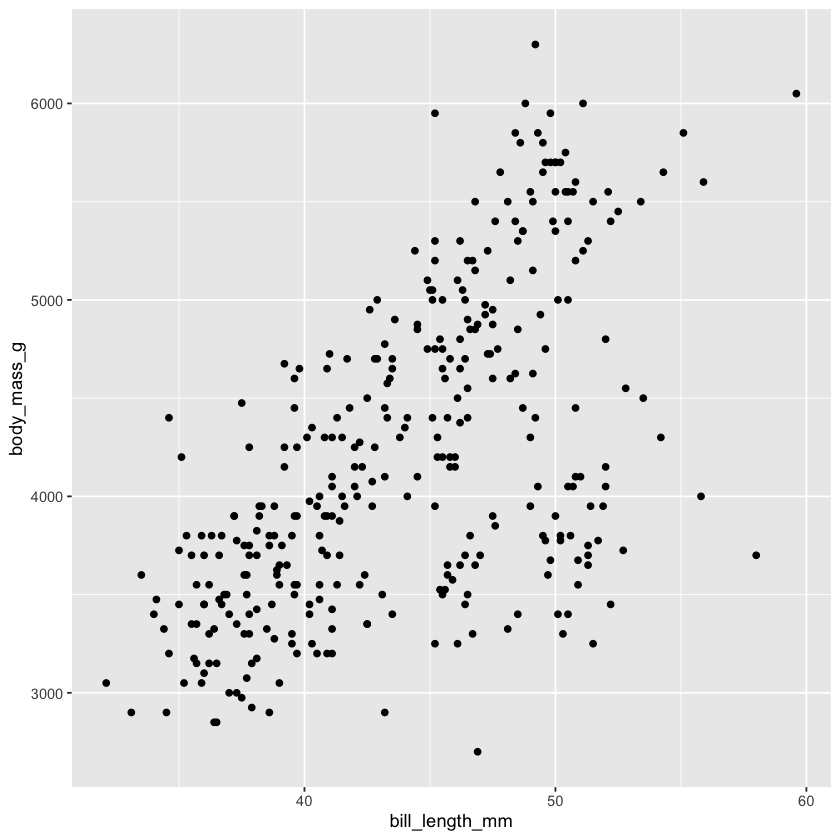

In [3]:
#| fig-cap: "くちばしが長い個体ほど体重が大きい傾向にある"
ggplot(data = penguins) +
  aes(bill_length_mm, body_mass_g) + 
  geom_point()

### 共分散 (covariance)

共分散は、2つの変数間の関係を数値化する手法の一つです。共分散は、2つの変数の偏差の積の平均値を表現します。偏差とは、平均値からのズレを表します。

以下の式で2つの変数の間の共分散を求めることができます。

$$
\begin{aligned}
\mathrm{cov}(X, Y) &= \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y}) \\
&= \frac{1}{n}\sum_{i=1}^{n}x_iy_i - \bar{x}\bar{y}
\end{aligned}
$$

共分散の求め方を一つ一つ読み解いてみましょう。まず、この式で使われる記号を確認します。

- $\mathrm{cov}(X, Y)$ : 変数 $X$ と変数 $Y$ の共分散
- $n$ : データの件数 
- $x_i$ および $y_i$ : 変数 $X$ 、変数 $Y$ における $i$ 番目のデータ
- $\bar{x}$ と $\bar{y}$ : 変数 $X$ 、変数 $Y$ それぞれの平均値

ここでは、共分散を用いて、くちばしの長さと体重の関係を数値化してみましょう。


In [4]:
# ペンギンデータからくちばしの長さと体重の2つの変数を選択し、
# 欠損していないデータのみを抽出
df <- 
  penguins |> 
  select(bill_length_mm, body_mass_g) |> 
  filter(!is.na(bill_length_mm), !is.na(body_mass_g))

In [5]:
# XとYにそれぞれくちばしの長さと体重のデータを代入
X <- df$bill_length_mm
Y <- df$body_mass_g

# くちばしの長さと体重の平均値を求める
mean_x <- mean(X)
mean_y <- mean(Y)

In [6]:
# X - mean_x でXの偏差を求める
# Xの各値がXの平均値からどの程度ズレているか
head(X - mean_x)
# Yについても同様に偏差を求め、Xの偏差とYの偏差の積を求める
step1_result <- (X - mean_x) * (Y - mean_y)
head(step1_result)

# 偏差の積を足し合わせ、データの件数で割る（平均値を求める）
# --> 共分散
step2_result <- sum(step1_result) / nrow(df)
step2_result

[1] -4.82193 -4.42193 -3.62193 -7.22193 -4.62193 -5.02193

[1] 2178.328 1776.530 3447.188 5429.117 2550.170 2896.420

[1] 2597.973

In [7]:
# 不偏共分散
sum(step1_result) / (nrow(df) -1)

[1] 2605.592

In [8]:
# 別の求め方
# 平均、偏差を求める
df <- 
  df |> 
  mutate(across(everything(),
                .fns = ~ mean(.x, na.rm = TRUE), 
                .names = "{.col}_mean")) |> 
  rowwise() |> 
  mutate(
    bill_length_deviation = bill_length_mm - bill_length_mm_mean,
    body_mass_deviation = body_mass_g - body_mass_g_mean)

df

bill_length_mm,body_mass_g,bill_length_mm_mean,body_mass_g_mean,bill_length_deviation,body_mass_deviation
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
39.1,3750,43.92193,4201.754,-4.82193,-451.754386
39.5,3800,43.92193,4201.754,-4.42193,-401.754386
40.3,3250,43.92193,4201.754,-3.62193,-951.754386
36.7,3450,43.92193,4201.754,-7.22193,-751.754386
39.3,3650,43.92193,4201.754,-4.62193,-551.754386
38.9,3625,43.92193,4201.754,-5.02193,-576.754386
39.2,4675,43.92193,4201.754,-4.72193,473.245614
34.1,3475,43.92193,4201.754,-9.82193,-726.754386
42.0,4250,43.92193,4201.754,-1.92193,48.245614


In [9]:
df |> 
  transmute(deviation_cross = bill_length_deviation * body_mass_deviation) |> 
  ungroup() |> 
  pull(deviation_cross) |> 
  sum(na.rm = TRUE) / nrow(df)

[1] 2597.973

ただいまの共分散の算出では、最終的にデータの件数 $n$ によって割りました。 しかしRの標準的な偏差を求める関数`cov()`は $n -1$ で割る処理を行います。 この方法で求めれらる共分散は不偏共分散と呼ばれるものです。


In [10]:
#| label: くちばしの長さと体重の共分散
#| eval: true
cov(X, Y, use = "complete.obs")

[1] 2605.592

$n$ で割る共分散を知りたい場合は次のようにします。


In [11]:
cov(X, Y) * (nrow(df) - 1) / nrow(df)

[1] 2597.973

共分散は、2つの変数の関係を表す指標です。共分散が正の値をとる場合は、2つの変数は正の相関があることを表します。共分散が負の値をとる場合は、2つの変数は負の相関があることを表します。共分散が0の場合は、2つの変数は相関がないことを表します。また、値の絶対値が大きいほど、2つの変数の関係が強いことを表します。ただし、共分散は、2つの変数の単位に依存するため、標準化による単位の統一や単位に依存しない相関係数を用いることが多いです。

ペンギンデータの場合、くちばしの長さはmm、体重はkgで記録されています。そのため、同じmm単位で記録されたくちばしの長さとくちばしの太さの共分散と比較すると、共分散の値が大きくなってしまいます。そこで、くちばしの長さと体重を標準化して共分散を求めてみましょう。


In [12]:
# 共通の単位で記録された2変数の共分散
cov(penguins$bill_length_mm, penguins$bill_depth_mm, use = "complete.obs")

[1] -2.534234

In [13]:
#| label: くちばしの長さと体重の標準化をおこなった共分散
cov(scale(penguins$bill_length_mm), scale(penguins$body_mass_g), use = "complete.obs")

0.5951098


In [14]:
cov(scale(penguins$bill_length_mm), scale(penguins$bill_depth_mm), use = "complete.obs")

-0.2350529


標準化された変数による共分散の値を比較することで、くちばしの長さと体重の関係がくちばしの長さとくちばしの太さの関係よりも強いことがわかります。

共分散の単位依存の問題は、標準化によって解決できますが、共分散の絶対値が大きくなるという問題は解決できません。そこで、2変数の関係の大きさを一定の範囲に収めるために、相関係数を用います。

### 相関係数 (Correlation coefficient)

共分散の単位依存の性質は、共分散 $cov(x, y)$ を各変数の標準偏差 $\sigma$ の積で割ることで解消できます。これを相関係数と呼びます。相関係数は次の式で定義されます。

$$
r_{xy} = \frac{cov(x, y)}{\sigma_x \sigma_y}
$$

ペンギンデータのくちばしの長さと体重について、共分散はさきほど計算したので、標準偏差を求めて相関係数の計算をしてみましょう。


In [15]:
#| label: くちばしの長さと体重の相関係数
# 標準偏差の計算
bill_length_sd <- sd(df$bill_length_mm, na.rm = TRUE)
body_mass_sd <- sd(df$body_mass_g, na.rm = TRUE)

# 相関係数の計算
cov(df$bill_length_mm, df$body_mass_g, use = "complete.obs") / (bill_length_sd * body_mass_sd)

[1] 0.5951098

相関係数はデータの測定単位や標準化の有無に依存しない、2つの変数の間の直線的な関係の強さを評価する指標となります。-1以上から1以下の値をとり、散布図にしたときに直線関係に近いもの、言い換えると変数の関係が強いほど、絶対値が1に近づきます。

相関係数にはいくつかの種類があり、中でもピアソンの積率相関係数が最も頻繁に利用されます。


In [16]:
#| label: 体長と体重の相関係数
# 体長と体重の相関係数
cor(df$bill_length_mm, df$body_mass_g, use = "complete.obs")

[1] 0.5951098

この値は正の値であるので、正の相関であることがわかります。一方で変数の関係の強さとしてはどの程度でしょうか。相関係数の判断基準として以下の目安が一般的に使われています。 0.59は「やや強い相関がある」と言えることがわかりました。


In [17]:
#| label: 相関係数の目安
#| eval: true
#| echo: false
tibble::tribble(
  ~相関係数, ~相関の強さ,
  "\u00b10.7以上", "とても強い",
  "\u00b10.4~0.7", "やや強い",
  "\u00b10.2~0.4", "弱い",
  "\u00b10.2以下", "ほとんどなし")

相関係数,相関の強さ
<chr>,<chr>
±0.7以上,とても強い
±0.4~0.7,やや強い
±0.2~0.4,弱い
±0.2以下,ほとんどなし


In [18]:
#| label: くちばしの長さと体重の相関分析
cor.test(df$bill_length_mm, df$body_mass_g)


	Pearson's product-moment correlation

data:  df$bill_length_mm and df$body_mass_g
t = 13.654, df = 340, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5220040 0.6595358
sample estimates:
      cor 
0.5951098 


相関係数は関係の強さを示す指標であって変数間の因果関係を示すものではありません。どんな変数間であろうと相関係数は必ず出る点も気にしておきましょう。2つの変数に対する関係として、片方の変数からもう片方の変数を説明することには回帰分析を実行する必要があります。

<!-- 
外れ値に注意、2変数間の関係が直線的でないとき（アンスコムの例）

因果関係との違い

見せかけの相関

「一人当たりのチョコレート消費量とノーベル賞受賞者数の相関」など
-->

#### 相関係数行列

相関係数行列は、複数の変数間の相関係数をまとめて表現した行列です。Rでは、`cor()`関数を使用して、相関係数行列を求めることができます。


In [19]:
cor(penguins[, c("bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g")], use = "complete.obs")

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.0000000,-0.2350529,0.6561813,0.5951098
bill_depth_mm,-0.2350529,1.0000000,-0.5838512,-0.4719156
flipper_length_mm,0.6561813,-0.5838512,1.0000000,0.8712018
body_mass_g,0.5951098,-0.4719156,0.8712018,1.0000000


相関行列を可視化することで、複数の変数間の相関関係を直感的に理解することができます。Rでは、corrplotパッケージの`corrplot()`関数を使用して、相関係数行列を可視化することができます。


In [20]:
#| eval: false
#| echo: true
#| label: corrplotパッケージのインストール
install.packages("corrplot")

corrplot 0.92 loaded



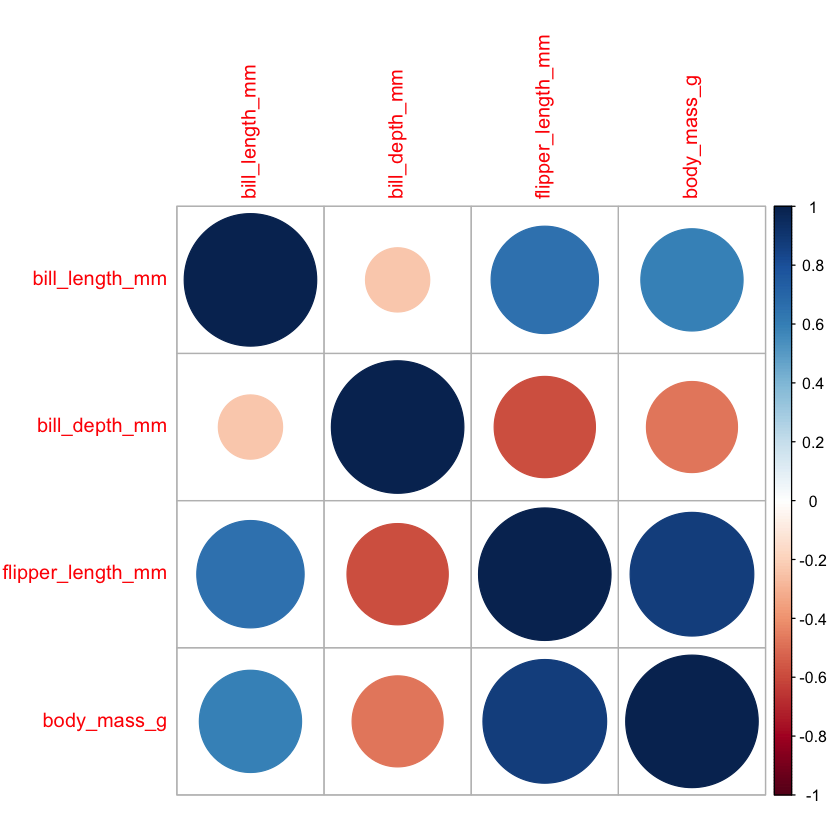

In [21]:
library(corrplot)
corrplot(cor(penguins[, c("bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g")], use = "complete.obs"))

出力される円の大きさとその色を比較することで、相関係数の値を直感的に理解することができます。ここでは円の大きさは、相関係数の絶対値の大きさを表します。円の色は、相関係数の符号を表します。青色は正の相関を、赤色は負の相関を表します。円の色の濃さは、相関係数の絶対値の大きさを表します。円の色の濃さが濃いほど相関係数の絶対値が大きいことを表します。
